In [62]:
from sklearn.preprocessing import OneHotEncoder
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
import re
%matplotlib inline

In [63]:
# XGBoost 등에 catval 을 쓰기 위해 인코딩을 하는데, 그 방법에 따른 결과의 차이가 발생하는지?

* pkl 불러오기

In [64]:
df = pd.read_pickle('data/main.pkl')
Dog = pd.read_pickle('data/Dog.pkl')
Cat = pd.read_pickle('data/Cat.pkl')

In [65]:
df.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeGroup,Type,numCol
26724,A702446,Unnamed,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,30,Domestic Shorthair Mix,dark,month,Mix,1
26725,A718934,Unnamed,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,90,Domestic Shorthair Mix,dark,month,Mix,0
26726,A698128,Named,2015-03-09 13:33:00,Adoption,None,Dog,Neutered Male,1460,Old English Bulldog Mix,light,year,Mix,1
26727,A677478,Unnamed,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,28,Domestic Shorthair Mix,dark,week,Mix,0
26728,A706629,Unnamed,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,365,Domestic Shorthair Mix,dark,year,Mix,1


In [66]:
Dog.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeGroup,Type,numCol,AKC
0,A671945,Named,2014-02-12 18:22:00,Return_to_owner,None,Dog,Neutered Male,365,Shetland Sheepdog,dark,year,Mix,1,Herding
2,A686464,Named,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,730,Bull Terrier,medium,year,Mix,1,Terrier
4,A667013,Unnamed,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,730,Lhasa Apso,medium,year,Mix,0,Non-Sporting
5,A677334,Named,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,30,Cairn Terrier,dark,month,Mix,1,Terrier
8,A671784,Named,2014-02-04 17:17:00,Adoption,None,Dog,Spayed Female,150,American Pit Bull Terrier,medium,month,Mix,1,Terrier


In [67]:
Cat.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeGroup,Type,numCol
26722,A687056,Unnamed,2014-08-31 09:00:00,Transfer,SCRP,Cat,Intact Male,150,Domestic Shorthair Mix,light,month,Mix,0
26724,A702446,Unnamed,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,30,Domestic Shorthair Mix,dark,month,Mix,1
26725,A718934,Unnamed,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,90,Domestic Shorthair Mix,dark,month,Mix,0
26727,A677478,Unnamed,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,28,Domestic Shorthair Mix,dark,week,Mix,0
26728,A706629,Unnamed,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,365,Domestic Shorthair Mix,dark,year,Mix,1


## 더미화

In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Dog['OutcomeType'] = encoder.fit_transform(Dog['OutcomeType'])
Dog['Name'] = encoder.fit_transform(Dog['Name'])
Dog['SexuponOutcome'] = encoder.fit_transform(Dog['SexuponOutcome'])
Dog['Type'] = encoder.fit_transform(Dog['Type'])
Dog['AKC'] = encoder.fit_transform(Dog['AKC'])
Dog['Color'] = encoder.fit_transform(Dog['Color'])
Dog['Breed'] = encoder.fit_transform(Dog['Breed'])
Dog['AgeGroup'] = encoder.fit_transform(Dog['AgeGroup'])

In [69]:
Dog.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeGroup,Type,numCol,AKC
26716,A697158,0,2015-05-02 21:04:00,0,Offsite,Dog,2,60,117,2,1,0,1,6
26717,A519949,0,2014-06-30 17:34:00,3,None,Dog,3,3285,45,1,3,0,0,6
26718,A701044,1,2015-04-28 14:26:00,0,None,Dog,2,60,150,1,1,0,1,6
26723,A716997,0,2016-01-29 18:52:00,0,None,Dog,2,2190,11,3,3,0,1,4
26726,A698128,0,2015-03-09 13:33:00,0,None,Dog,2,1460,122,2,3,0,1,2


In [70]:
X = Dog[['SexuponOutcome', 'AgeuponOutcome', 'AKC', 'Type', 'Name']]
y = Dog['OutcomeType']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## 분류나무 실행

In [72]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)

In [73]:
clf = clf.fit(X_train, y_train)

In [74]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.535567715458
0.541164401128


In [75]:
clf.feature_importances_

array([ 0.51277694,  0.38200985,  0.        ,  0.        ,  0.10521321])

In [76]:
from IPython.display import Image
from sklearn import tree
import pydotplus 
import graphviz

In [77]:
# class, feature name에 자동으로 들어가는 방법 없는지?

In [78]:
y

0        3
2        0
4        4
5        4
8        0
9        0
11       0
12       0
13       3
14       3
17       4
19       3
20       4
22       0
23       0
24       3
26       0
27       0
31       4
33       3
34       4
35       2
36       3
45       3
48       0
49       2
53       0
57       4
58       3
59       0
        ..
26672    3
26674    3
26676    2
26678    3
26679    4
26680    3
26681    3
26684    3
26686    0
26688    4
26689    3
26690    4
26694    2
26695    3
26696    0
26697    3
26699    2
26700    3
26701    4
26708    4
26709    0
26710    4
26711    4
26712    3
26715    0
26716    0
26717    3
26718    0
26723    0
26726    0
Name: OutcomeType, Length: 15595, dtype: int64

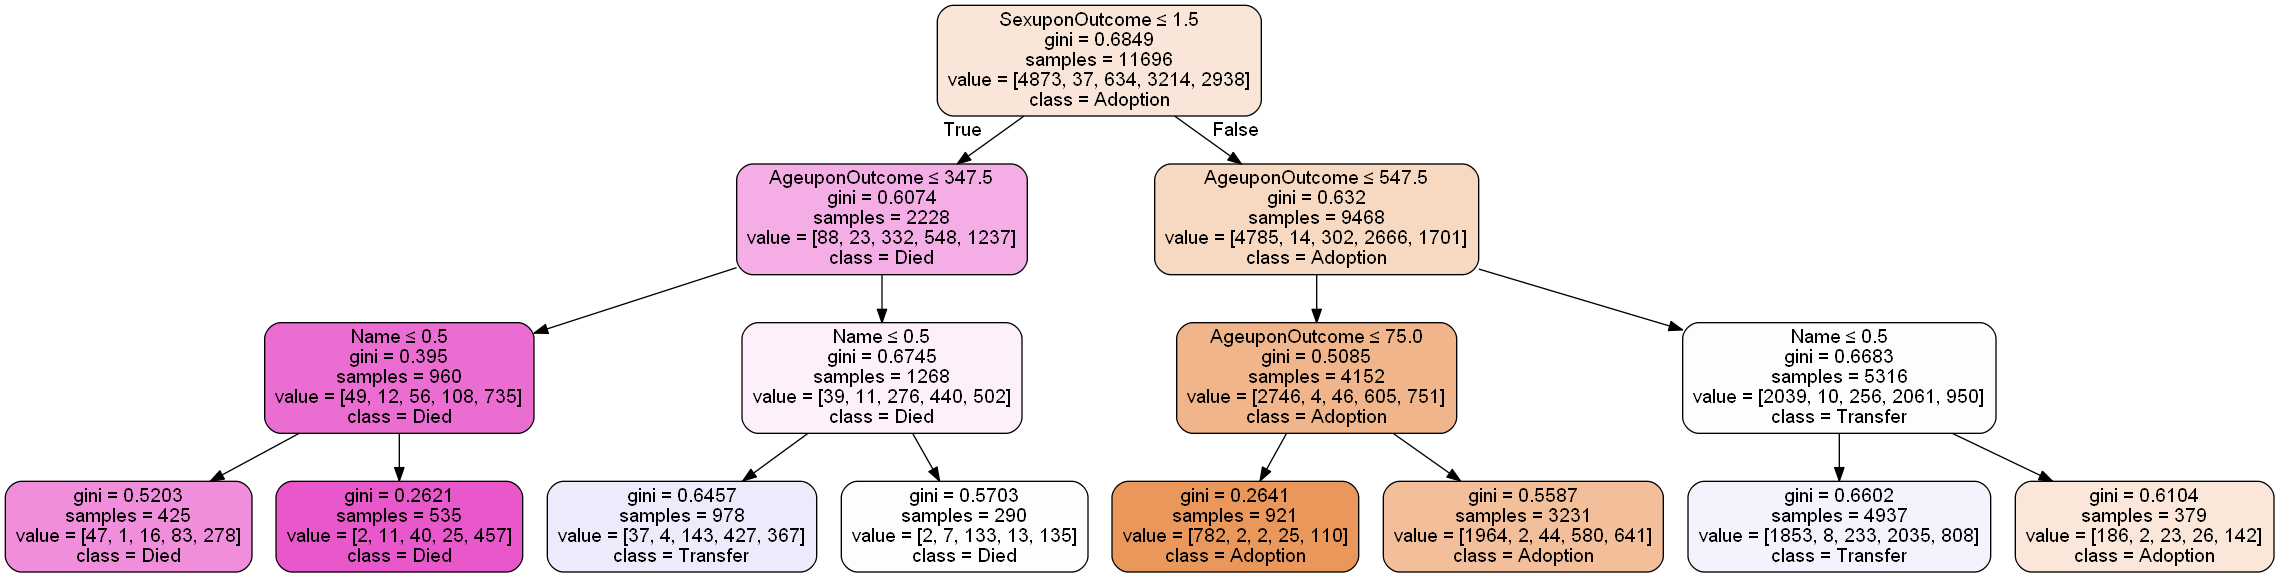

In [79]:
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True, max_depth=3,
                               feature_names=X.columns,
                               class_names=['Adoption', 'Euthanasia', 'Return to owner', 'Transfer', 'Died'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
forest = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=2, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [82]:
forest.feature_importances_

array([ 0.2994153 ,  0.45132756,  0.14938494,  0.02417069,  0.07570151])

In [83]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.620639534884
0.550910489869


## Bagging

In [84]:
from sklearn.ensemble import BaggingClassifier

In [85]:
bagging = BaggingClassifier(DecisionTreeClassifier())

In [86]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [87]:
print(bagging.score(X_train, y_train))
print(bagging.score(X_test, y_test))

0.617390560876
0.551936393947


## Gradient Boosting

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.05)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [90]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.579685362517
0.57553218774


In [91]:
gbrt.predict_proba(X_test)

array([[ 0.33271467,  0.00352473,  0.03976297,  0.46035688,  0.16364075],
       [ 0.33192215,  0.00365073,  0.0441124 ,  0.45443199,  0.16588273],
       [ 0.48840244,  0.00368016,  0.02900757,  0.31791586,  0.16099397],
       ..., 
       [ 0.84745195,  0.00240241,  0.00704027,  0.01545697,  0.12764841],
       [ 0.46199256,  0.00371956,  0.02973772,  0.32702186,  0.1775283 ],
       [ 0.84745195,  0.00240241,  0.00704027,  0.01545697,  0.12764841]])

## XGBoost

In [92]:
import xgboost as xgb

In [93]:
xgbr = xgb.XGBClassifier(n_estimators=100, max_depth=5)

In [94]:
xgbr.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
print(xgbr.score(X_train, y_train))
print(xgbr.score(X_test, y_test))

0.586183310534
0.577840471916


In [97]:
mean_squared_error(y_train, xgbr.predict(X_train))

3.5435191518467852

In [98]:
y_pred = xgbr.predict(X_test)
mean_squared_error(y_test, y_pred)

3.5798922800718134

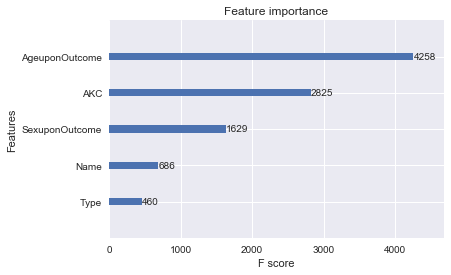

In [99]:
xgb.plot_importance(xgbr)

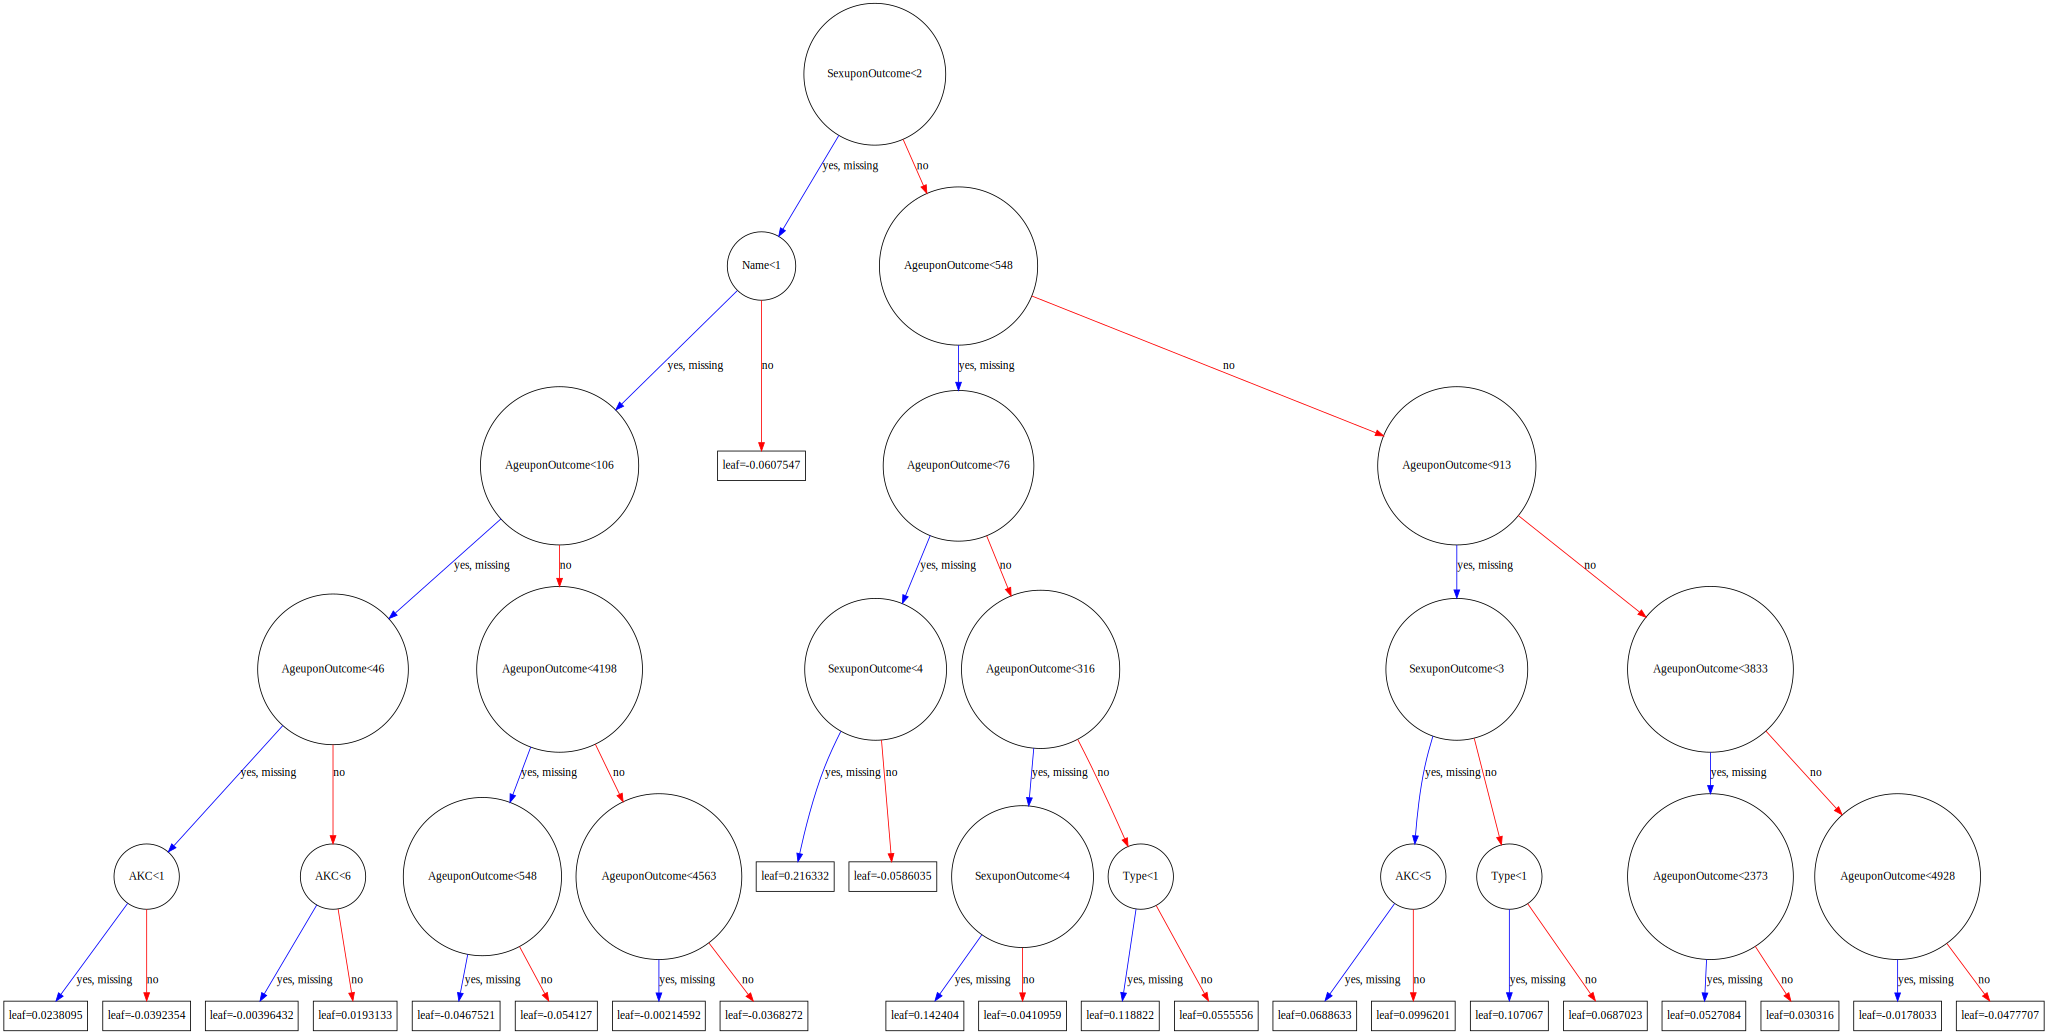

In [100]:
xgb.to_graphviz(xgbr, num_trees=0)